<a href="https://colab.research.google.com/github/mhyls26/CCADMACL_EXERCISES/blob/main/Exercise3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3B

In this exercise, you will explore how the DBSCAN clustering algorithm identifies dense groups and outliers in the Pokémon statistics dataset. You will analyze the dataset, scale features, determine DBSCAN parameters, run DBSCAN, and interpret the clustering results.

In [16]:
import kagglehub
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [17]:
# Download latest version
path = kagglehub.dataset_download("abcsds/pokemon")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pokemon' dataset.
Path to dataset files: /kaggle/input/pokemon


In [18]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Load the Dataset (8 pts)

Load the Pokémon dataset into a pandas DataFrame.

Show the first five rows (3 pts)

In [19]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False



How many Pokémon are in the dataset? (2 pts)


In [20]:
df.shape

(800, 13)


List all columns available (3 pts)

In [21]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

## 2: Select Features & Clean the Data (8 pts)

Select the numeric features needed for clustering (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed). (3 pts)

In [22]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = df[features]

X.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


Are there any missing values? (2 pts)

In [23]:
X.isna().sum()

,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0


If missing values exist, describe how you handled them (3 pts)

no missing values in the selected numeric features. no cleaning was necessary


*Example of handling missing values (only if needed)*

**X = X.fillna(X.mean())**

# 3. Scale the Features (10 pts)

Apply StandardScaler to the selected features.

Show the transformed feature sample (e.g., first 5 rows) (10 pts)


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503
1,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015
2,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853


## 4. Determine a Suitable eps Value (10 pts)

Using k = 4:
Compute the distance to the 4th nearest neighbor for each Pokémon (6 pts)

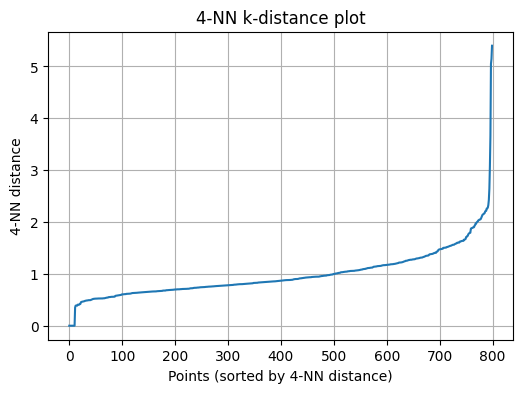

In [33]:
nbrs = NearestNeighbors(n_neighbors=5).fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)
k4 = np.sort(distances[:, 4])
plt.figure(figsize=(6,4))
plt.plot(k4)
plt.xlabel('Points (sorted by 4-NN distance)')
plt.ylabel('4-NN distance')
plt.title('4-NN k-distance plot')
plt.grid(True)
plt.show()

What is your chosen eps based on the "elbow"? (2 pts)

Chosen eps: 1.8

One-sentence explanation of your reasoning (2 pts)

The curve bends sharply at about 1.8, so 1.8 is a good eps because the distances stay low before that point and then rise quickly.

## 5. Run DBSCAN (10 points)

Run DBSCAN using your chosen eps and min_samples


How many clusters did DBSCAN find? (4 pts)

In [37]:
db = DBSCAN(eps=1.8, min_samples=4).fit(X_scaled)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

1

***DBSCAN found 1 cluster.***

How many Pokémon were labeled as noise? (4 pts)

In [38]:
n_noise = list(labels).count(-1)
n_noise

13

***There were 13 noise points.***

Show the unique labels output by DBSCAN (2 pts)

In [39]:
set(labels)

{np.int64(-1), np.int64(0)}

***The labels are {-1, 0}, where -1 = noise and 0 = the only cluster.***

## 6. Attach Cluster Labels to the Original Dataset (7 points)

Add the cluster labels back to the original DataFrame (3 pts)

In [40]:
df['Cluster'] = labels

Show the first 10 rows including the cluster label (4 pts)

In [41]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,0
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,0
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,0
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,0
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,0


## 7. Explore the Clusters (12 points)

For each cluster:


How many Pokémon does it contain? (4 pts)

In [42]:
df['Cluster'].value_counts()

,count
Cluster,
0,787
-1,13


What are the average Attack, Defense, and Speed? (4 pts)


In [43]:
df.groupby('Cluster')[['Attack', 'Defense', 'Speed']].mean()

,Attack,Defense,Speed
Cluster,,,
-1,71.000000,86.769231,62.538462
0,79.133418,73.628971,68.372300


Compare the clusters: What differences do you notice? (4 pts)

***Cluster 0*** has almost all Pokémon. Their Attack, Defense, and Speed are close to the average Pokémon stats.


***Cluster -1*** has only a few Pokémon. They have higher Defense but lower Attack and Speed, which makes them stand out from the rest.

## 8. Identify Outliers (10 points)

List all Pokémon labeled as noise (cluster = -1) (4 pts)

In [44]:
df[df['Cluster'] == -1][['Name', 'Attack', 'Defense', 'Speed', 'Legendary']]

,Name,Attack,Defense,Speed,Legendary
87,SlowbroMega Slowbro,75,180,30,False
103,Onix,45,160,70,False
121,Chansey,5,5,50,False
155,Snorlax,110,65,30,False
217,Wobbuffet,33,58,33,False
230,Shuckle,10,230,5,False
261,Blissey,10,10,55,False
415,Regice,50,100,50,True
422,KyogrePrimal Kyogre,150,90,90,True
429,DeoxysAttack Forme,180,20,150,True


Are many of them legendary? (3 pts)

In [45]:
df[df['Cluster'] == -1]['Legendary'].value_counts()

,count
Legendary,
False,9
True,4


Explain why DBSCAN might classify them as outliers (3 pts)

DBSCAN marks them as outliers because their stats are very different from most Pokémon.

Some have extremely high Defense, some have very low Attack, and others have very fast or very slow Speed.

These unusual numbers make them stand apart from the main group, so DBSCAN does not place them in the main cluster.

## 9. Interpret the Clustering Results (25 points)
Write a short interpretation (4–6 sentences).
Discuss:

**What types of Pokémon grouped together (5 pts)**

Most Pokémon were placed in one big cluster, meaning they share similar Attack, Defense, and Speed stats. They represent the “average” Pokémon with balanced or moderate stats.

**Whether the clusters make intuitive sense (10 pts)**

Yes, the results make sense because most Pokémon follow common stat patterns, so DBSCAN naturally groups them together. Only a few Pokémon have extreme or unusual stats, so they do not fit the main cluster.

**What the noise points reveal about DBSCAN (5 pts)**

The noise points show that DBSCAN is good at spotting Pokémon that are very different from the rest. These outliers have extreme high or low values and therefore do not belong to any dense group.

**What stat patterns you discovered (5 pts)**

The outliers often had very high Defense, very low Attack, or extremely fast or slow Speed. The main cluster had more balanced and moderate stat values.